In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# CSV dosyasını oku
df = pd.read_csv("Crop_recommendation.csv")

# İlk 5 satırı göster
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
X = df.drop("label", axis=1)  # Girdi (features)
y = df["label"]               # Çıktı (target crop)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [6]:
y_pred = model.predict(X_test)

print("🎯 Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\n📊 Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))


🎯 Doğruluk Oranı: 0.9954545454545455

📊 Sınıflandırma Raporu:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange      

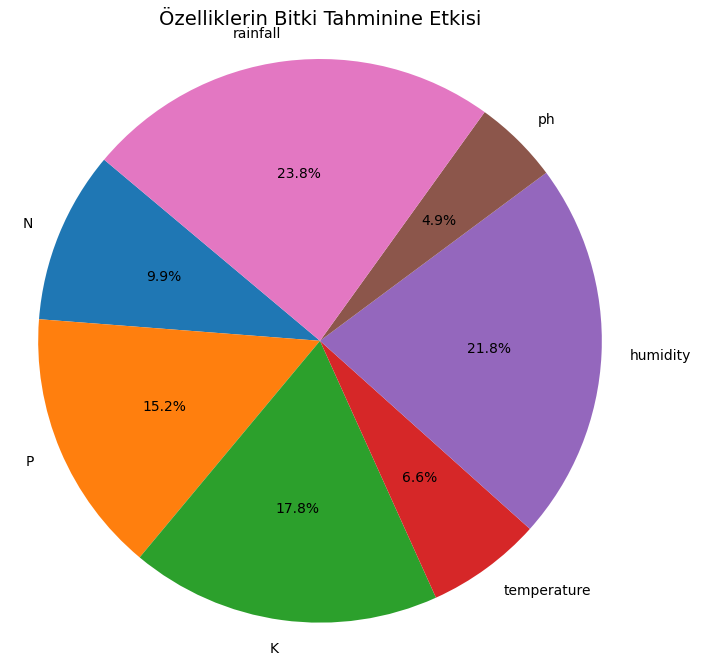

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(model.feature_importances_, labels=X.columns, autopct='%1.1f%%', startangle=140)
plt.title("Özelliklerin Bitki Tahminine Etkisi", fontsize=14)
plt.axis('equal')
plt.show()


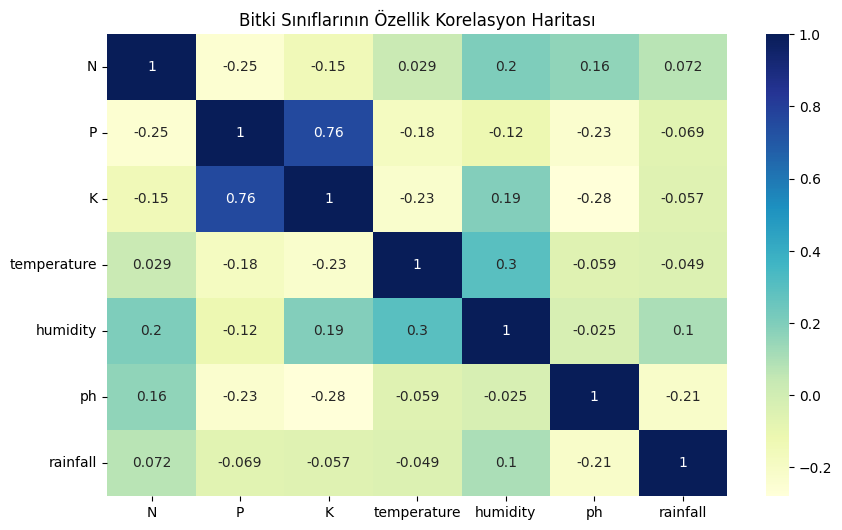

In [8]:
grouped = df.groupby("label").mean()

plt.figure(figsize=(10, 6))
sns.heatmap(grouped.corr(), annot=True, cmap="YlGnBu")
plt.title("Bitki Sınıflarının Özellik Korelasyon Haritası")
plt.show()


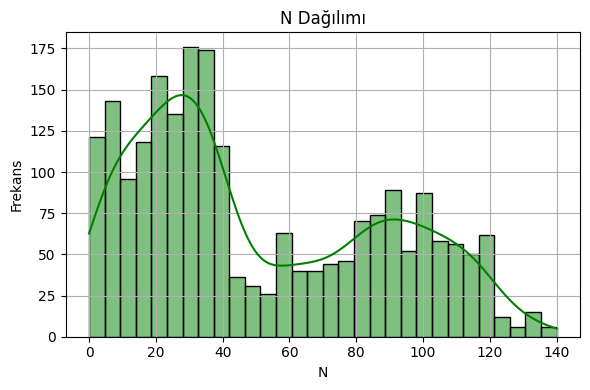

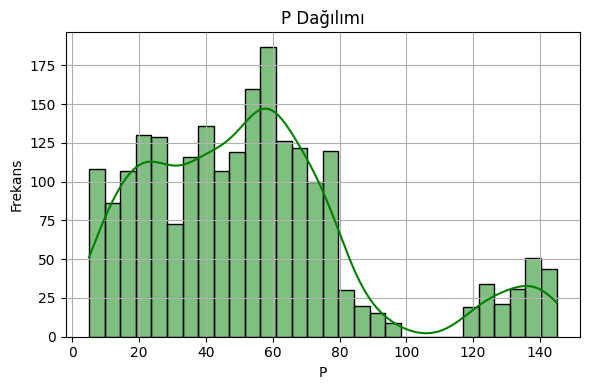

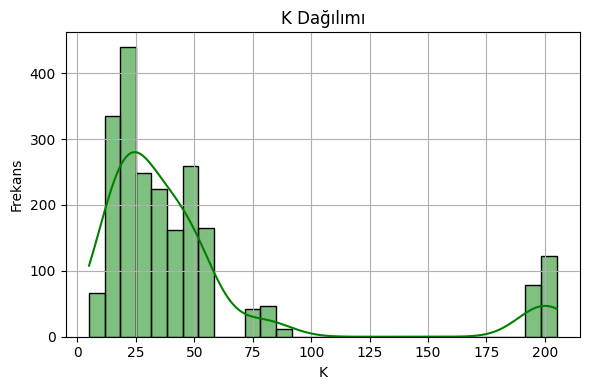

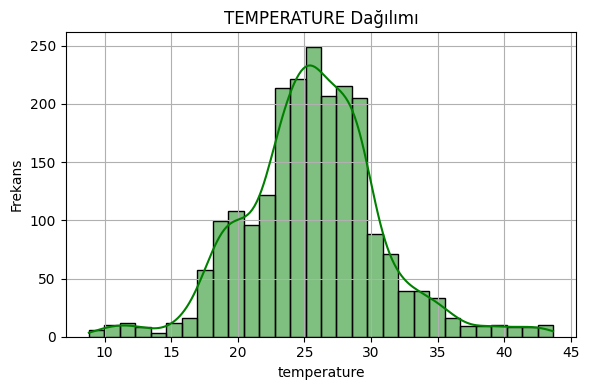

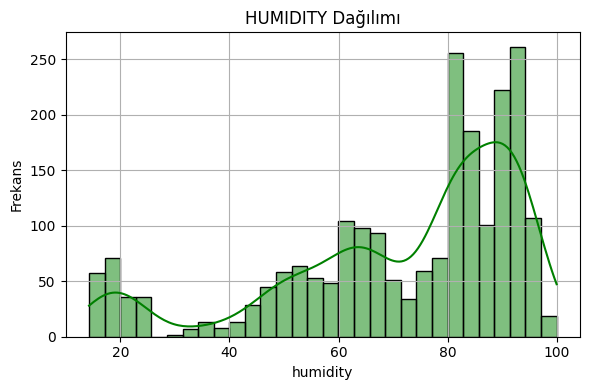

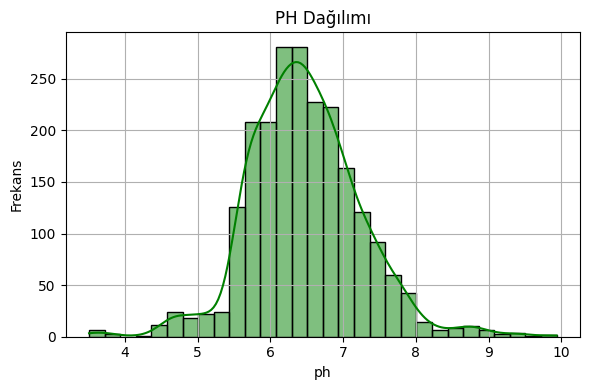

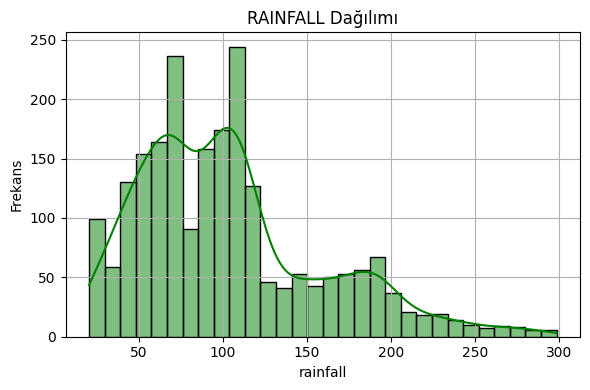

In [9]:
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True, bins=30, color='green')
    plt.title(f"{col.upper()} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [11]:
print("🌱 Tahmine Dayalı Bitki Önerisi Sistemi")
print("Lütfen aşağıdaki bilgileri giriniz:\n")

n = float(input("Topraktaki Azot miktarı (N): "))
p = float(input("Topraktaki Fosfor miktarı (P): "))
k = float(input("Topraktaki Potasyum miktarı (K): "))
temp = float(input("Sıcaklık (°C): "))
hum = float(input("Nem (%): "))
ph = float(input("Toprak pH değeri: "))
rain = float(input("Yağış miktarı (mm): "))

# Tahmin et
user_input = [[n, p, k, temp, hum, ph, rain]]
prediction = model.predict(user_input)[0]

print("\n✅ Tahmin Edilen En Uygun Ürün:")
print(f"🌿 Önerilen Ürün: {prediction.upper()}")

🌱 Tahmine Dayalı Bitki Önerisi Sistemi
Lütfen aşağıdaki bilgileri giriniz:

Topraktaki Azot miktarı (N): 1
Topraktaki Fosfor miktarı (P): 2
Topraktaki Potasyum miktarı (K): 1
Sıcaklık (°C): 2
Nem (%): 3
Toprak pH değeri: 2
Yağış miktarı (mm): 4

✅ Tahmin Edilen En Uygun Ürün:
🌿 Önerilen Ürün: KIDNEYBEANS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
bilgi = {
    "rice": "Pirinç, sıcak ve nemli iklimleri sever. Genellikle bol yağışlı bölgelerde, özellikle monsun ikliminde yetiştirilir.",
    "maize": "Mısır, iyi güneş alan ve orta düzeyde nem isteyen tarlalarda yetişir. Drenajı iyi toprakları sever.",
    "jute": "Jüt, sıcak ve nemli iklimlerde yetişir. Lif bitkisi olarak kullanılır ve genellikle monsun bölgelerinde bulunur.",
    "cotton": "Pamuk, sıcak ve kuru iklimlerde yetişir. Güneşli hava ve uzun süreli sıcaklık gerektirir.",
    "coconut": "Hindistancevizi, tropikal iklimlerde ve kıyı bölgelerinde yetişir. Nemli ve sıcak ortamları sever.",
    "papaya": "Papaya, sıcak ve nemli iklimlerde gelişir. Hızlı büyüyen tropikal bir meyve türüdür.",
    "orange": "Portakal, ılıman ve nemli iklimi sever. Drenajı iyi topraklar tercih edilir.",
    "apple": "Elma, soğuk ve serin iklimlerde yetişir. Yüksek rakımlı bölgeler idealdir.",
    "muskmelon": "Kavun, sıcak hava ve az nemli bölgeleri sever. Drenajı iyi, hafif topraklarda yetişir.",
    "watermelon": "Karpuz, sıcak ve güneşli iklimlerde yetişir. Sulama düzenli olmalıdır.",
    "grapes": "Üzüm, ılıman ve kuru iklimlerde yetişir. Verimli bağlar için uygun budama önemlidir.",
    "mango": "Mango, tropikal ve yarı tropikal iklimlerde yetişir. Yüksek sıcaklık ve güneşlenme ister.",
    "banana": "Muz, yüksek sıcaklık ve nem isteyen tropikal bir meyvedir. Bol su ve gübreleme gerektirir.",
    "pomegranate": "Nar, kurak ve yarı kurak iklimlerde yetişir. Drenajı iyi, killi toprakları tercih eder.",
    "lentil": "Mercimek, serin iklimlerde yetişir. Hafif, kumlu-tınlı topraklar uygundur.",
    "blackgram": "Urad Dal, tropikal ve subtropikal iklimlerde yetişir. Kısa sürede hasada gelir.",
    "mungbean": "Moong Dal, sıcak iklimlerde yetişir. Kuraklığa dayanıklıdır.",
    "mothbeans": "Moth Beans, kurak ve yarı kurak bölgelerde yetişir. Az su ister.",
    "pigeonpeas": "Toor Dal, sıcak iklimlerde yetişir. Derin, iyi drene toprakları sever.",
    "kidneybeans": "Barbunya, orta sıcaklıktaki bölgeleri tercih eder. Sulama düzenli olmalıdır.",
    "chickpea": "Nohut, serin ve kuru iklimleri sever. Az su isteyen dayanıklı bir baklagildir.",
    "coffee": "Kahve, nemli ve serin yüksek bölgelerde yetişir. Gölgeli alanları sever."
}


In [14]:
if prediction in bilgi:
    print(f"\nℹ️ Bilgi: {bilgi[prediction]}")



ℹ️ Bilgi: Barbunya, orta sıcaklıktaki bölgeleri tercih eder. Sulama düzenli olmalıdır.
